In [24]:
import tensorflow as tf
print(tf.__version__)

2.2.0


In [25]:
import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

In [26]:
imdb, info = tfds.load("imdb_reviews/subwords8k", with_info= True, as_supervised= True)

In [27]:
train_data, test_data = imdb['train'], imdb['test']

In [28]:
tokenizer = info.features['text'].encoder

In [29]:
print(tokenizer.subwords)

['the_', ', ', '. ', 'a_', 'and_', 'of_', 'to_', 's_', 'is_', 'br', 'in_', 'I_', 'that_', 'this_', 'it_', ' /><', ' />', 'was_', 'The_', 'as_', 't_', 'with_', 'for_', '.<', 'on_', 'but_', 'movie_', ' (', 'are_', 'his_', 'have_', 'film_', 'not_', 'ing_', 'be_', 'ed_', 'you_', ' "', 'it', 'd_', 'an_', 'he_', 'by_', 'at_', 'one_', 'who_', 'y_', 'from_', 'e_', 'or_', 'all_', 'like_', 'they_', '" ', 'so_', 'just_', 'has_', ') ', 'her_', 'about_', 'out_', 'This_', 'some_', 'ly_', 'movie', 'film', 'very_', 'more_', 'It_', 'would_', 'what_', 'when_', 'which_', 'good_', 'if_', 'up_', 'only_', 'even_', 'their_', 'had_', 'really_', 'my_', 'can_', 'no_', 'were_', 'see_', 'she_', '? ', 'than_', '! ', 'there_', 'get_', 'been_', 'into_', ' - ', 'will_', 'much_', 'story_', 'because_', 'ing', 'time_', 'n_', 'we_', 'ed', 'me_', ': ', 'most_', 'other_', 'don', 'do_', 'm_', 'es_', 'how_', 'also_', 'make_', 'its_', 'could_', 'first_', 'any_', "' ", 'people_', 'great_', 've_', 'ly', 'er_', 'made_', 'r_', 'B

In [30]:
sample_string = 'TensorFlow, from basics to mastery'

tokenized_string = tokenizer.encode(sample_string)
print ('Tokenized string is {}'.format(tokenized_string))

original_string = tokenizer.decode(tokenized_string)
print ('The original string: {}'.format(original_string))

Tokenized string is [6307, 2327, 4043, 2120, 2, 48, 4249, 4429, 7, 2652, 8050]
The original string: TensorFlow, from basics to mastery


In [31]:
for ts in tokenized_string:
    print ('{} ----> {}'.format(ts, tokenizer.decode([ts])))

6307 ----> Ten
2327 ----> sor
4043 ----> Fl
2120 ----> ow
2 ----> , 
48 ----> from 
4249 ----> basi
4429 ----> cs 
7 ----> to 
2652 ----> master
8050 ----> y


In [32]:
max_length = 200
trunc_type = 'post'

training_tokens = []
training_labels = []
test_tokens = []
test_labels = []

for token, label in train_data:
    training_tokens.append(token.numpy())
    training_labels.append(label.numpy())

for token, label in test_data:
    test_tokens.append(token.numpy())
    test_labels.append(label.numpy())

In [33]:
training_tokens_padded = np.array(pad_sequences(training_tokens, maxlen=max_length, truncating=trunc_type))
training_tokens = np.array(training_tokens)
training_labels = np.array(training_labels)
test_tokens_padded = np.array(pad_sequences(test_tokens, maxlen=max_length, truncating=trunc_type))
test_tokens = np.array(test_tokens)
test_labels = np.array(test_labels)

In [34]:
print("Training Token Length : {} of {} dimension".format(len(training_tokens), training_tokens.shape))
print("Training Token Padded Length : {} of {} dimension".format(len(training_tokens_padded), training_tokens_padded.shape))
print("Training Label Length : {} of {} dimension".format(len(training_labels), training_labels.shape))
print("Test Token Length : {} of {} dimension".format(len(test_tokens), test_tokens.shape))
print("Test Token Padded Length : {} of {} dimension".format(len(test_tokens_padded), test_tokens_padded.shape))
print("Test Label Length : {} of {} dimension".format(len(test_labels), test_labels.shape))

Training Token Length : 25000 of (25000,) dimension
Training Token Padded Length : 25000 of (25000, 200) dimension
Training Label Length : 25000 of (25000,) dimension
Test Token Length : 25000 of (25000,) dimension
Test Token Padded Length : 25000 of (25000, 200) dimension
Test Label Length : 25000 of (25000,) dimension


In [35]:
embedding_dim = 64

model = tf.keras.Sequential([
    
    tf.keras.layers.Embedding(tokenizer.vocab_size, embedding_dim, input_length=training_tokens_padded.shape[1]),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

In [36]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 200, 64)           523840    
_________________________________________________________________
global_average_pooling1d_2 ( (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 390       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 7         
Total params: 524,237
Trainable params: 524,237
Non-trainable params: 0
_________________________________________________________________


In [37]:
num_epochs = 10

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [38]:
history = model.fit(training_tokens_padded, training_labels, epochs=num_epochs, validation_data=(test_tokens_padded, test_labels))

Epoch 1/10
782/782 [==============================] - 3s 4ms/step - loss: 0.5150 - accuracy: 0.7684 - val_loss: 0.3959 - val_accuracy: 0.8198
Epoch 2/10
782/782 [==============================] - 4s 5ms/step - loss: 0.3032 - accuracy: 0.8776 - val_loss: 0.3687 - val_accuracy: 0.8365
Epoch 3/10
782/782 [==============================] - 4s 5ms/step - loss: 0.2470 - accuracy: 0.9001 - val_loss: 0.3883 - val_accuracy: 0.8314
Epoch 4/10
782/782 [==============================] - 4s 5ms/step - loss: 0.2159 - accuracy: 0.9162 - val_loss: 0.4262 - val_accuracy: 0.8251
Epoch 5/10
782/782 [==============================] - 4s 5ms/step - loss: 0.1948 - accuracy: 0.9245 - val_loss: 0.4566 - val_accuracy: 0.8212
Epoch 6/10
782/782 [==============================] - 4s 5ms/step - loss: 0.1783 - accuracy: 0.9319 - val_loss: 0.5024 - val_accuracy: 0.8142
Epoch 7/10
782/782 [==============================] - 4s 4ms/step - loss: 0.1652 - accuracy: 0.9400 - val_loss: 0.5327 - val_accuracy: 0.8138
Epoch 

In [39]:
import matplotlib.pyplot as plt

def plot_graph(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_' + string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend(string, 'val_' + string)
    plt.show()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: The handle 'u' has a label of '_' which cannot be automatically added to the legend.
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Legend does not support 'a' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Legend does not support 'c' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Legend does not support 'r' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
 

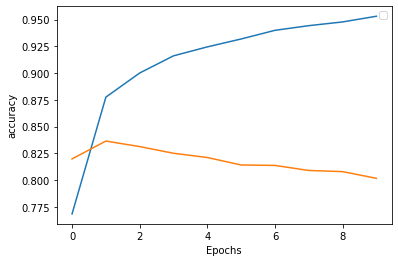

In [40]:
plot_graph(history, "accuracy")

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: The handle 's' has a label of '_' which cannot be automatically added to the legend.
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Legend does not support 'l' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Legend does not support 'o' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Legend does not support 's' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
 

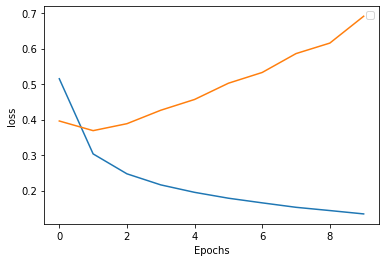

In [42]:
plot_graph(history, "loss")

In [43]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, tokenizer.vocab_size):
    word = tokenizer.decode([word_num])
    embeddings = weights[word_num]
    out_m.write(word + "\n")
    out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

(8185, 64)
